# NumPy Basics: Arrays and Vectorized Computation

In [326]:
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [325]:
np.set_printoptions?


In [4]:
import numpy as np
my_arr = np.arange(1000000)
my_list = list(range(1000000))

In [5]:
%time for _ in range(10): my_arr2 = my_arr * 2
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

Wall time: 13.4 ms
Wall time: 586 ms


## The NumPy ndarray: A Multidimensional Array Object

In [6]:
import numpy as np
# Generate some random data
data = np.random.randn(2, 3)
data

array([[-0.2047,  0.4789, -0.5194],
       [-0.5557,  1.9658,  1.3934]])

In [7]:
data * 10
data + data

array([[-0.4094,  0.9579, -1.0389],
       [-1.1115,  3.9316,  2.7868]])

In [8]:
data.shape
data.dtype

dtype('float64')

### Creating ndarrays

In [ ]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

In [ ]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

In [ ]:
arr2.ndim
arr2.shape

In [ ]:
arr1.dtype
arr2.dtype

In [ ]:
np.zeros(10)
np.zeros((3, 6))
np.empty((2, 3, 2))

In [ ]:
np.arange(15)

### Data Types for ndarrays

In [ ]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
arr1.dtype
arr2.dtype

In [ ]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype
float_arr = arr.astype(np.float64)
float_arr.dtype

In [ ]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr
arr.astype(np.int32)

In [ ]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings.astype(float)

In [ ]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

In [ ]:
empty_uint32 = np.empty(8, dtype='u4')
empty_uint32

### Arithmetic with NumPy Arrays

In [ ]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr
arr * arr
arr - arr

In [ ]:
1 / arr
arr ** 0.5

In [ ]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2
arr2 > arr

### Basic Indexing and Slicing

In [ ]:
arr = np.arange(10)
arr
arr[5]
arr[5:8]
arr[5:8] = 12
arr

In [ ]:
arr_slice = arr[5:8]
arr_slice

In [ ]:
arr_slice[1] = 12345
arr

In [ ]:
arr_slice[:] = 64
arr

In [ ]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

In [ ]:
arr2d[0][2]
arr2d[0, 2]

In [ ]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

In [ ]:
arr3d[0]

In [ ]:
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d
arr3d[0] = old_values
arr3d

In [ ]:
arr3d[1, 0]

In [ ]:
x = arr3d[1]
x
x[0]

#### Indexing with slices

In [ ]:
arr
arr[1:6]

In [ ]:
arr2d
arr2d[:2]

In [ ]:
arr2d[:2, 1:]

In [ ]:
arr2d[1, :2]

In [ ]:
arr2d[:2, 2]

In [ ]:
arr2d[:, :1]

In [ ]:
arr2d[:2, 1:] = 0
arr2d

### Boolean Indexing

In [ ]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
names
data

In [ ]:
names == 'Bob'

In [ ]:
data[names == 'Bob']

In [ ]:
data[names == 'Bob', 2:]
data[names == 'Bob', 3]

In [ ]:
names != 'Bob'
data[~(names == 'Bob')]

In [ ]:
cond = names == 'Bob'
data[~cond]

In [ ]:
mask = (names == 'Bob') | (names == 'Will')
mask
data[mask]

In [ ]:
data[data < 0] = 0
data

In [ ]:
data[names != 'Joe'] = 7
data

### Fancy Indexing

In [ ]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

In [ ]:
arr[[4, 3, 0, 6]]

In [ ]:
arr[[-3, -5, -7]]

In [ ]:
arr = np.arange(32).reshape((8, 4))
arr
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

In [ ]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

### Transposing Arrays and Swapping Axes

In [ ]:
arr = np.arange(15).reshape((3, 5))
arr
arr.T

In [ ]:
arr = np.random.randn(6, 3)
arr
np.dot(arr.T, arr)

In [ ]:
arr = np.arange(16).reshape((2, 2, 4))
arr
arr.transpose((1, 0, 2))

In [ ]:
arr
arr.swapaxes(1, 2)

## Universal Functions: Fast Element-Wise Array Functions

In [ ]:
arr = np.arange(10)
arr
np.sqrt(arr)
np.exp(arr)

In [ ]:
x = np.random.randn(8)
y = np.random.randn(8)
x
y
np.maximum(x, y)

In [ ]:
arr = np.random.randn(7) * 5
arr
remainder, whole_part = np.modf(arr)
remainder
whole_part

In [ ]:
arr
np.sqrt(arr)
np.sqrt(arr, arr)
arr

## Array-Oriented Programming with Arrays

In [ ]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points)
ys

In [ ]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

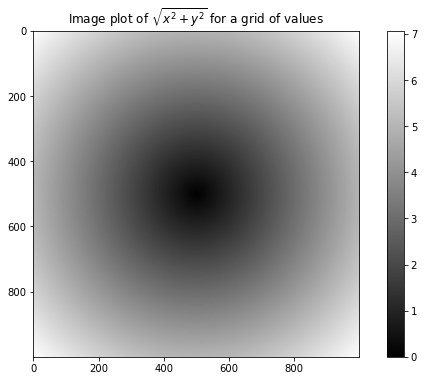

In [327]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

In [328]:
plt.draw()

<Figure size 720x432 with 0 Axes>

In [329]:
plt.close('all')

### Expressing Conditional Logic as Array Operations

In [ ]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [ ]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

In [ ]:
result = np.where(cond, xarr, yarr)
result

In [ ]:
arr = np.random.randn(4, 4)
arr
arr > 0
np.where(arr > 0, 2, -2)

In [ ]:
np.where(arr > 0, 2, arr) # set only positive values to 2

### Mathematical and Statistical Methods

In [ ]:
arr = np.random.randn(5, 4)
arr
arr.mean()
np.mean(arr)
arr.sum()

In [ ]:
arr.mean(axis=1)
arr.sum(axis=0)

In [ ]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

In [ ]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr
arr.cumsum(axis=0)
arr.cumprod(axis=1)

### Methods for Boolean Arrays

In [ ]:
arr = np.random.randn(100)
(arr > 0).sum() # Number of positive values

In [ ]:
bools = np.array([False, False, True, False])
bools.any()
bools.all()

### Sorting

In [ ]:
arr = np.random.randn(6)
arr
arr.sort()
arr

In [ ]:
arr = np.random.randn(5, 3)
arr
arr.sort(1)
arr

In [ ]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5% quantile

### Unique and Other Set Logic

In [ ]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

In [ ]:
sorted(set(names))

In [ ]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

## File Input and Output with Arrays

In [ ]:
arr = np.arange(10)
np.save('some_array', arr)

In [ ]:
np.load('some_array.npy')

In [ ]:
np.savez('array_archive.npz', a=arr, b=arr)

In [ ]:
arch = np.load('array_archive.npz')
arch['b']

In [ ]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

In [ ]:
!rm some_array.npy
!rm array_archive.npz
!rm arrays_compressed.npz

## Linear Algebra

In [324]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x
y
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [ ]:
np.dot(x, np.ones(3))

In [ ]:
x @ np.ones(3)

In [ ]:
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)
mat = X.T.dot(X)
inv(mat)
mat.dot(inv(mat))
q, r = qr(mat)
r

## Pseudorandom Number Generation

In [ ]:
np.dot(x, y)

In [ ]:
samples = np.random.normal(size=(4, 4))
samples

In [ ]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.normal(size=N)

In [ ]:
np.random.seed(1234)

In [ ]:
rng = np.random.RandomState(1234)
rng.randn(10)

## Example: Random Walks

In [330]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

In [331]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

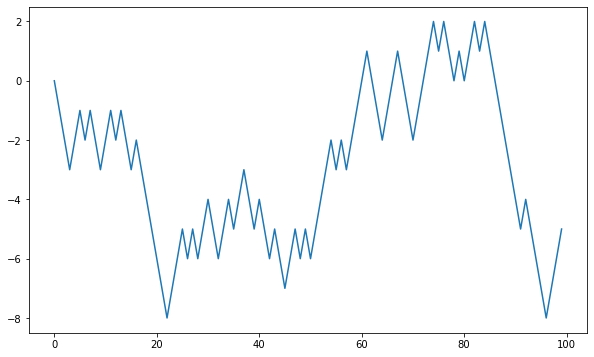

In [332]:
plt.plot(walk[:100])

In [333]:
np.random.seed(12345)

In [334]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

In [ ]:
walk.min()
walk.max()

In [ ]:
(np.abs(walk) >= 10).argmax()

### Simulating Many Random Walks at Once

In [ ]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

In [ ]:
walks.max()
walks.min()

In [ ]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30
hits30.sum() # Number that hit 30 or -30

In [ ]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

In [ ]:
steps = np.random.normal(loc=0, scale=0.25,
                         size=(nwalks, nsteps))

## Conclusion